# Matheus Araujo Pinheiro

# Katlyn Ribeiro Almeida

# Julia Graziosi Ortiz

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definição da função f(x) dada no problema
def f(x):
    return 63 * x**5 - 381 * x**4 + 496 * x**3 + 204 * x**2 - 544 * x + 192

# Derivada da função f(x), necessária para o Método de Newton
def df(x):
    return 315 * x**4 - 1524 * x**3 + 1488 * x**2 + 408 * x - 544

# Função phi para encontrar a raiz no intervalo [0, 1] devido a multiplicidade da raiz no intervalo
def p(x) :
    return ((63 * x**5 - 381 * x**4 + 496 * x**3 + 204 * x**2 - 544 * x + 192) / (3 * x - 2))

# Derivada da função phi, necessária para o Método de Newton
def dp(x) :
    return 81 * x**3 - 339 * x**2 + 180 * x + 128


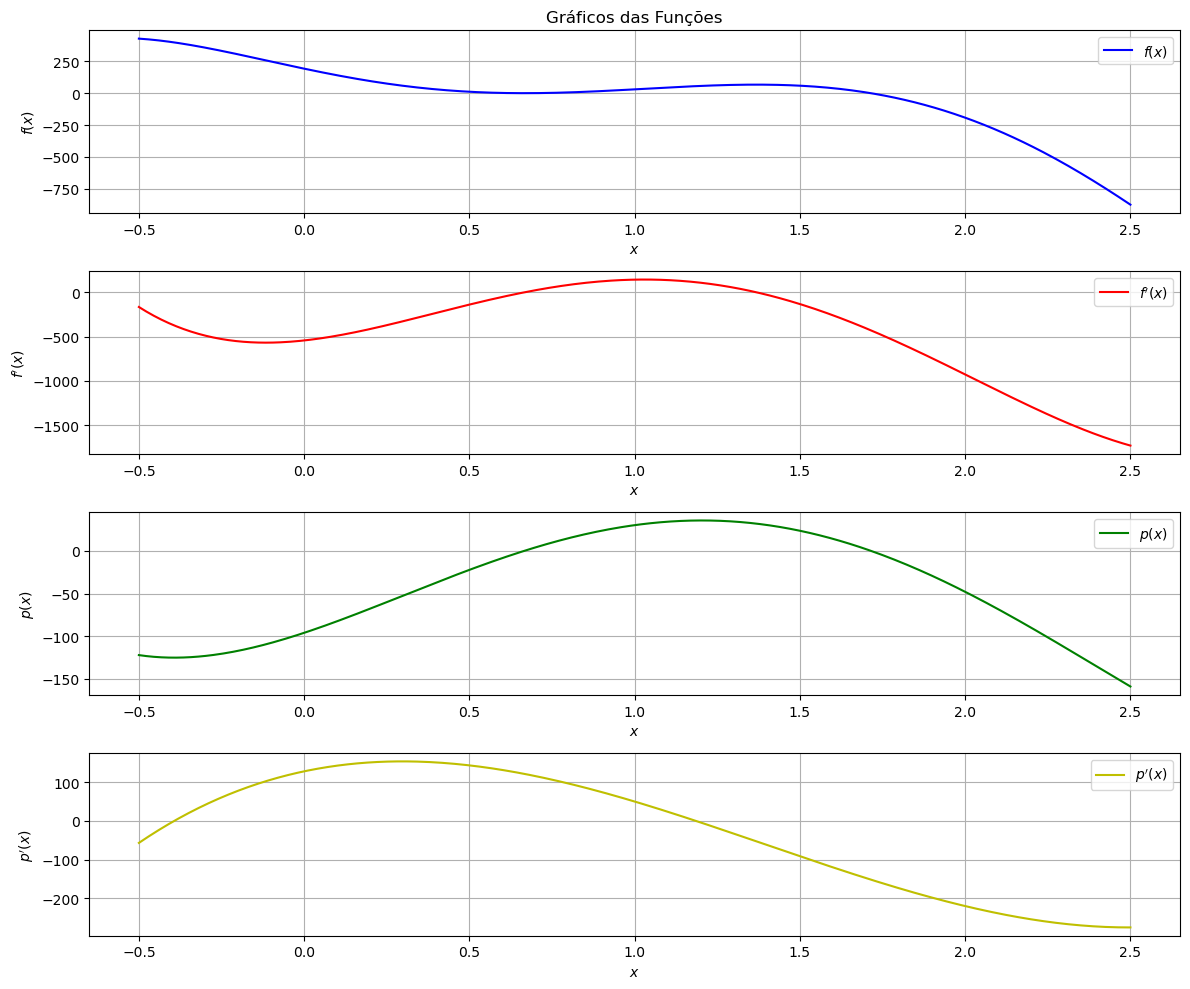

In [ ]:
# Defina as funções f, df, p e dp conforme necessário antes de usar este código

# Intervalo de x
x = np.linspace(-0.5, 2.5, 400)

# Calculando os valores das funções
y_f = f(x)
y_df = df(x)
y_p = p(x)
y_dp = dp(x)  # Presumindo que dp(x) seja a derivada de p(x) ou outra função

# Plotando as funções
plt.figure(figsize=(12, 10))

# Gráfico de f(x)
plt.subplot(4, 1, 1)
plt.plot(x, y_f, label='$f(x)$', color='b')
plt.title('Gráficos das Funções')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.legend()

# Gráfico de f'(x)
plt.subplot(4, 1, 2)
plt.plot(x, y_df, label="$f'(x)$", color='r')
plt.xlabel('$x$')
plt.ylabel("$f'(x)$")
plt.grid(True)
plt.legend()

# Gráfico de p(x)
plt.subplot(4, 1, 3)
plt.plot(x, y_p, label='$p(x)$', color='g')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)
plt.legend()

# Gráfico de p'(x)
plt.subplot(4, 1, 4)
plt.plot(x, y_dp, label="$p'(x)$", color='y')  # Corrigido para y_dp
plt.xlabel('$x$')
plt.ylabel("$p'(x)$")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
def bissecao(f, a, b, epsilon, alpha):
    # Imprime o cabeçalho da tabela com os nomes das colunas
    print(f"{'k':^8} {'a':^12} {'f(a)':^12} {'b':^12} {'f(b)':^12} {'xk':^12} {'f(xk)':^12} {'Erro':^12}")
    print("="*92)  # Linha de separação para melhorar a legibilidade
    
    k = 1  # Inicializa o contador de iterações
    xkantes = a  # Define o valor inicial de xkantes (anterior) como a
    
    while True:
        fa = f(a)  # Calcula f(a)
        fb = f(b)  # Calcula f(b)
        xk = (a + b) / 2  # Calcula o ponto médio
        fxk = f(xk)  # Calcula f(xk)
        erro = abs(xk - alpha)  # Calcula o erro em relação ao valor conhecido alpha
        
        # Imprime os resultados da iteração atual
        print(f"{k:^8} {a:^12.8f} {fa:^12.8f} {b:^12.8f} {fb:^12.8f} {xk:^12.8f} {fxk:^12.8f} {erro:^12.8f}")
        
        # Condição de parada: se a diferença entre xk e xkantes é menor que epsilon ajustado
        if abs(xk - xkantes) < epsilon * (1 + abs(xk)):
            break  # Sai do loop se a condição de parada for atendida
        
        # Atualiza os intervalos e o valor de xkantes
        if fa * fxk < 0:
            b = xk
            xkantes = xk
        else:
            a = xk
            xkantes = xk
        
        k += 1  # Incrementa o contador de iterações

# Define o valor de epsilon (tolerância)
epsilon = 1e-6

# Executa o método da bisseção no intervalo [0, 1] com alpha = 2/3
print("Método da Bisseção no intervalo [0, 1]:")
bissecao(p, 0, 1, epsilon, (2/3))

# Executa o método da bisseção no intervalo [1, 2] com alpha = 12/7
print("\nMétodo da Bisseção no intervalo [1, 2]:")
bissecao(f, 1, 2, epsilon, (12/7))


Método da Bisseção no intervalo [0, 1]:
   k          a           f(a)          b           f(b)          xk         f(xk)         Erro    
   1      0.00000000  -96.00000000  1.00000000  30.00000000   0.50000000  -22.31250000  0.16666667 
   2      0.50000000  -22.31250000  1.00000000  30.00000000   0.75000000   9.59765625   0.08333333 
   3      0.50000000  -22.31250000  0.75000000   9.59765625   0.62500000  -5.22729492   0.04166667 
   4      0.62500000  -5.22729492   0.75000000   9.59765625   0.68750000   2.51106262   0.02083333 
   5      0.62500000  -5.22729492   0.68750000   2.51106262   0.65625000  -1.28176403   0.01041667 
   6      0.65625000  -1.28176403   0.68750000   2.51106262   0.67187500   0.63439590   0.00520833 
   7      0.65625000  -1.28176403   0.67187500   0.63439590   0.66406250  -0.31882856   0.00260417 
   8      0.66406250  -0.31882856   0.67187500   0.63439590   0.66796875   0.15900776   0.00130208 
   9      0.66406250  -0.31882856   0.66796875   0.15900776 

In [5]:
def newton(f, df, x0, epsilon, alpha):
    print(f"{'k':^8} {'xk':^12} {'f(xk)':^12} {'df(xk)':^12} {'Erro':^12}")
    print("="*64)
    k = 0
    fxk = 1
    while True:
        fxk = f(x0)
        dfxk = df(x0)
        
        # Calcula o próximo xk usando a fórmula de Newton
        xk_new = x0 - fxk / dfxk
        
        # Calcula o erro 
        erro = abs(xk_new - alpha)
        
        # Exibe os valores da iteração atual
        print(f"{k:^8} {x0:^12.8f} {fxk:^12.8f} {dfxk:^12.8f} {erro:^12.8f}")
        
        # Verifica a condição de parada
        if abs(xk_new - x0) < epsilon *(1 + abs(xk_new)):
            # Imprime a última iteração quando o erro é menor que epsilon
            k += 1
            print(f"{k:^8} {xk_new:^12.8f} {f(xk_new):^12.8f} {df(xk_new):^12.8f} {erro:^12.8f}")
            break
        
        # Atualiza x0 para a próxima iteração
        x0 = xk_new
        k += 1

# Teste do Método de Newton nos intervalos [0, 1] e [1, 2]
epsilon = 1e-6

print("Método de Newton no intervalo [0, 1]:")
newton(p, dp, 1, epsilon, (2/3))  # Escolhendo x0 = 1 como ponto inicial

print("\nMétodo de Newton no intervalo [1, 2]:")
newton(f, df, 2, epsilon, (12/7))  # Escolhendo x0 = 2 como ponto inicial


Método de Newton no intervalo [0, 1]:
   k          xk         f(xk)        df(xk)        Erro    
   0      1.00000000  30.00000000  50.00000000   0.26666667 
   1      0.40000000  -37.09440000 150.94400000  0.02091725 
   2      0.64574942  -2.59102956  124.68557792  0.00013674 
   3      0.66652992  -0.01671445  121.35575577  0.00000099 
   4      0.66666766   0.00012084  121.33317119  0.00000001 
   5      0.66666666  -0.00000130  121.33333452  0.00000001 

Método de Newton no intervalo [1, 2]:
   k          xk         f(xk)        df(xk)        Erro    
   0      2.00000000  -192.00000000 -928.00000000  0.07881773 
   1      1.79310345  -38.83713077 -558.00839553  0.00921819 
   2      1.72350390  -4.02158501  -443.58696617  0.00015213 
   3      1.71443785  -0.06527747  -429.20810386  0.00000004 
   4      1.71428576  -0.00001826  -428.96799722  0.00000000 
   5      1.71428571  -0.00000000  -428.96793003  0.00000000 


In [6]:
def secantes(f, x0, x1, epsilon, alpha):
    # Imprime o cabeçalho da tabela com os nomes das colunas
    print(f"{'k':^8} {'xk':^12} {'f(xk)':^12} {'Erro':^12}")
    print("="*48)  # Linha de separação para melhorar a legibilidade
    print(f"{0:^8} {x0:^12.8f} {f(x0):^12.8f} {abs(x0 - alpha):^12.8f}")
    
    k = 1  # Inicializa o contador de iterações
    
    while True:
        fx0 = f(x0)  # Calcula f(x0)
        fx1 = f(x1)  # Calcula f(x1)
        
        # Verifica se a diferença entre fx1 e fx0 é zero para evitar divisão por zero
        if fx1 - fx0 == 0:
            print("Divisão por zero na secante.")
            return None  # Retorna None se houver uma divisão por zero
        
        # Calcula o novo ponto xk usando o método das secantes
        xk = (fx1*x0 - fx0*x1)/(fx1 - fx0)
        erro = abs(xk - alpha)  # Calcula o erro em relação ao valor conhecido alpha
        
        # Imprime os resultados da iteração atual
        print(f"{k:^8} {x1:^12.8f} {fx1:^12.8f} {erro:^12.8f}")
        
        # Condição de parada: se a diferença entre xk e x1 é menor que epsilon ajustado
        if abs(xk - x1) < epsilon * (1 + abs(xk)):
            break  # Sai do loop se a condição de parada for atendida
        
        # Atualiza os valores de x0 e x1 para a próxima iteração
        x0, x1 = x1, xk
        k += 1  # Incrementa o contador de iterações

# Define o valor de epsilon (tolerância)
epsilon = 1e-6

# Executa o método das secantes com x0 = 0 e x1 = 1 no intervalo [0, 1]
print("\nMétodo das Secantes no intervalo [0, 1]:")
secantes(p, 0, 1, epsilon, (2/3))  # A função p deve ser definida antes de executar

# Executa o método das secantes com x0 = 1.5 e x1 = 2 no intervalo [1, 2]
print("\nMétodo das Secantes no intervalo [1, 2]:")
secantes(f, 1.5, 2, epsilon, (12/7))  # A função p deve ser definida antes de executar



Método das Secantes no intervalo [0, 1]:
   k          xk         f(xk)         Erro    
   0      0.00000000  -96.00000000  0.66666667 
   1      1.00000000  30.00000000   0.09523810 
   2      0.76190476  10.86707699   0.03999473 
   3      0.62667193  -5.01251109   0.00269252 
   4      0.66935919   0.32850517   0.00006700 
   5      0.66673366   0.00818811   0.00000012 
   6      0.66666655  -0.00001455   0.00000000 

Método das Secantes no intervalo [1, 2]:
   k          xk         f(xk)         Erro    
   0      1.50000000  58.59375000   0.21428571 
   1      2.00000000  -192.00000000  0.09737588 
   2      1.61690984  34.54543555   0.03895926 
   3      1.67532645  15.53028653   0.00875147 
   4      1.72303718  -3.81472759   0.00065682 
   5      1.71362890   0.28141379   0.00001045 
   6      1.71427527   0.00448226   0.00000001 
   7      1.71428573  -0.00000542   0.00000000 
